In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

Видим что в столбцах Age и Cabin очень много пропущенных значений. В Embarked - 2, можно выкинуть

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


c:\users\user\ml_practice\ml_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Выжили - 1: 549
Погибли - 0: 342


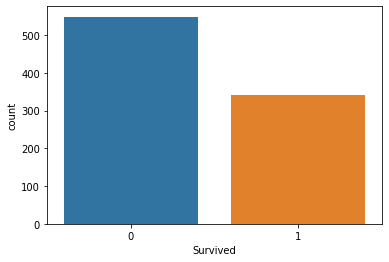

In [8]:
y_train = train.Survived
sns.countplot(y_train, label='Count')
S, D = y_train.value_counts()
print('Выжили - 1:', S)
print('Погибли - 0:', D)

Отделим категориальные признаки от числовых

In [9]:
drop_list = ['PassengerId', 'Survived']
train.drop(drop_list, axis=1, inplace=True)

В категориальных признаках есть пол("Sex"). Преобразуем его к числовому перед разделением

In [10]:
train.Sex.replace('male', 1, inplace=True)
train.Sex.replace('female', 0, inplace=True)

In [11]:
train_cat = train.select_dtypes(include=['object'], exclude=None)
train_dig = train.select_dtypes(include=['int64', 'float64'], exclude=None)
train_cat.head(5)

,Name,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,C
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,S
4,"Allen, Mr. William Henry",373450,NaN,S


In [12]:
train_dig.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Есть разброс по максимальным значением: перед визуализацией нормализуем данные

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Pclass'),
  Text(1, 0, 'Sex'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'SibSp'),
  Text(4, 0, 'Parch'),
  Text(5, 0, 'Fare')])

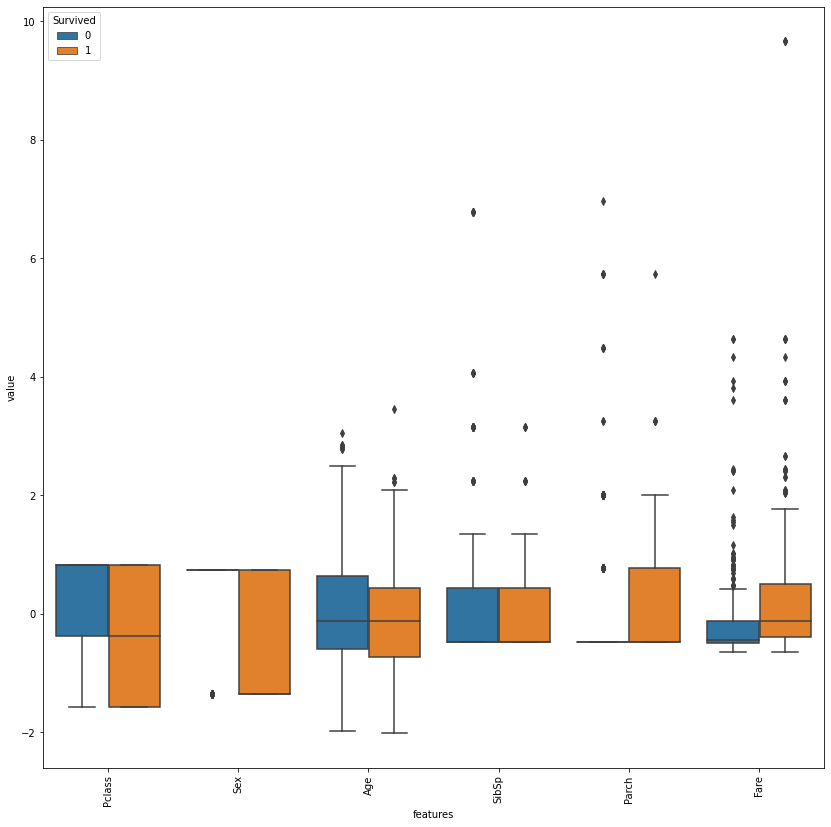

In [13]:
train_std = (train_dig - train_dig.mean()) / train_dig.std() 
train_std = pd.concat([y_train, train_std], axis=1)
train_std = pd.melt(train_std, id_vars="Survived",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,14))
sns.boxplot(x='features', y='value', hue="Survived", data=train_std)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

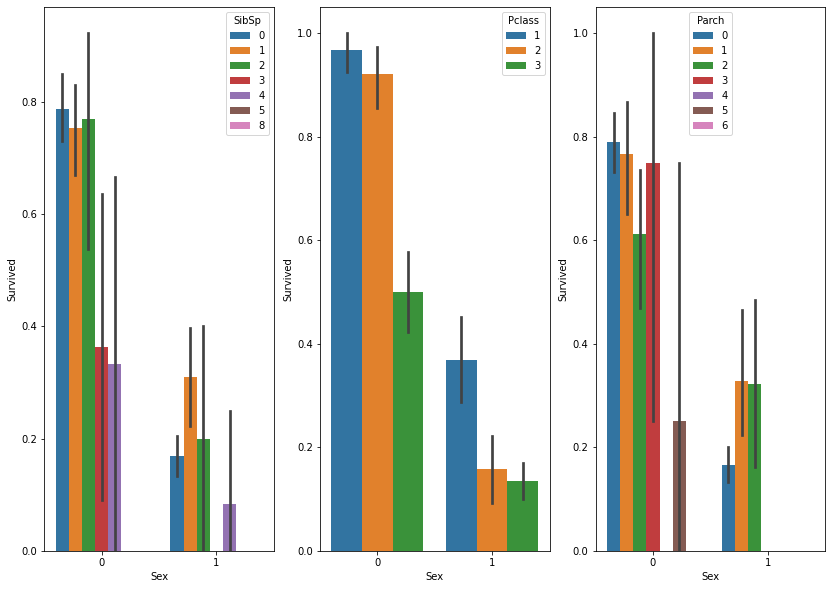

In [22]:
fig, qaxis = plt.subplots(1, 3, figsize=(14,10))
d = train
d["Survived"] = y_train
sns.barplot(x='Sex', y='Survived', hue='SibSp', data=d, ax=qaxis[0])
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=d, ax=qaxis[1])
sns.barplot(x='Sex', y='Survived', hue='Parch', data=d, ax=qaxis[2])

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train_dig.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5, fmt= '.1f')

Признаки друг с другом не коррелируют, удалять признаки не требуется

In [1]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
X = data[cols.values].drop('OverallQual', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

In [ ]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

In [ ]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=data['OverallQual'], alpha=.5);

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['GarageCars', 'FullBath']):
    for value in sorted(data[name].unique()):
        axes[i].scatter(tsne_repr[data[name]==value, 0], tsne_repr[data[name]==value, 1], 
                        alpha=.5, label=value)
    axes[i].set_title(name)
    axes[i].legend()